In [2]:
import pandas as pd

file_mifaser = "analysis.tsv"
file_argsoap = "unnormalized_count.ec_number.txt"

In [6]:
mifaser_data = pd.read_csv(file_mifaser, sep=",", header=None, names=["EC"])

argsoap_data = pd.read_csv(file_argsoap, sep="\t")

mifaser_data_split = mifaser_data["EC"].str.split("\t", expand=True)
mifaser_data_split.columns = ["EC", "Count"]
mifaser_data_split["Count"] = mifaser_data_split["Count"].astype(float)

# Strip whitespace from EC numbers for uniformity
mifaser_data_split["EC"] = mifaser_data_split["EC"].str.strip()
argsoap_data["ec_number"] = argsoap_data["ec_number"].str.strip()

# Merge datasets again with cleaned data
merged_data_cleaned = pd.merge(
    mifaser_data_split, argsoap_data, left_on="EC", right_on="ec_number", suffixes=("_mifaser", "_argsoap")
)

# Normalize counts for comparison
merged_data_cleaned["Normalized_mifaser"] = (
    merged_data_cleaned["Count"] / merged_data_cleaned["Count"].sum()
)
merged_data_cleaned["Normalized_argsoap"] = (
    merged_data_cleaned["G68"] / merged_data_cleaned["G68"].sum()
)

# Save the cleaned and merged dataset
output_path = "cleaned_merged_annotation_comparison.csv"
merged_data_cleaned.to_csv(output_path, index=False)

print("Data processed and saved to:", output_path)

Data processed and saved to: cleaned_merged_annotation_comparison.csv


In [8]:
merged_data_cleaned["Absolute_Difference"] = (
    merged_data_cleaned["Normalized_mifaser"] - merged_data_cleaned["Normalized_argsoap"]
).abs()

merged_data_cleaned["Relative_Difference"] = (
    merged_data_cleaned["Absolute_Difference"] / merged_data_cleaned["Normalized_mifaser"]
)

summary = merged_data_cleaned[["Absolute_Difference", "Relative_Difference"]].describe()
print(summary)

       Absolute_Difference  Relative_Difference
count         1.590000e+03          1590.000000
mean          3.731716e-04             1.087775
std           1.344554e-03             4.311593
min           4.261445e-09             0.000161
25%           1.427244e-05             0.408183
50%           8.364103e-05             0.725273
75%           3.237130e-04             0.959541
max           3.806510e-02           128.724130


In [9]:
from scipy.stats import wilcoxon

# Test di Wilcoxon per differenze tra MiFaser e ARGs-OAP
wilcoxon_stat, wilcoxon_p = wilcoxon(
    merged_data_cleaned["Normalized_mifaser"], merged_data_cleaned["Normalized_argsoap"]
)

print(f"Wilcoxon test statistic: {wilcoxon_stat}, p-value: {wilcoxon_p}")

Wilcoxon test statistic: 410027.0, p-value: 6.059541526146671e-34


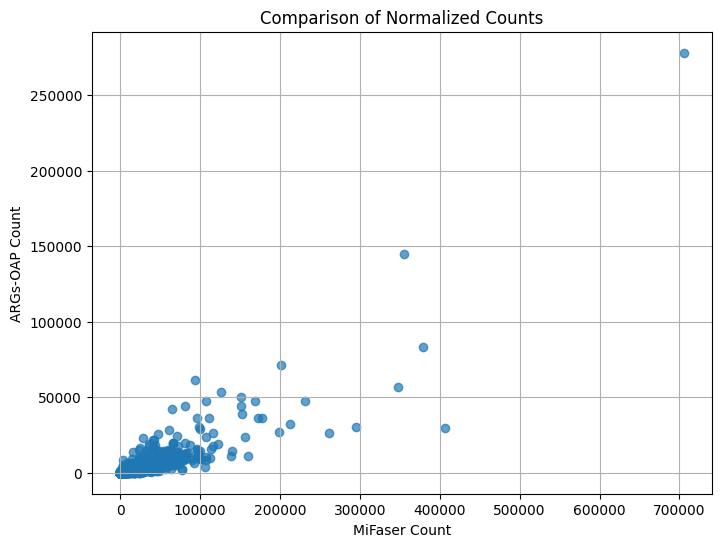

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data_cleaned["Count"],
    merged_data_cleaned["G68"],
    alpha=0.7
)
plt.title("Comparison of Normalized Counts")
plt.xlabel("MiFaser Count")
plt.ylabel("ARGs-OAP Count")
plt.grid(True)
plt.show()

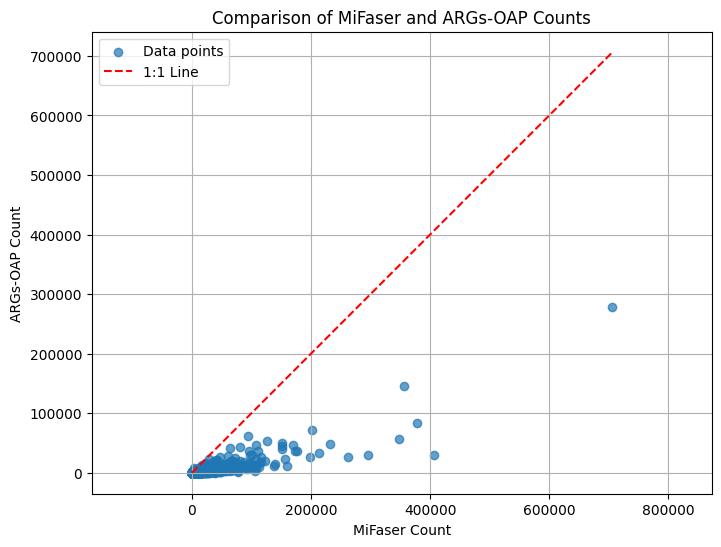

In [17]:
import matplotlib.pyplot as plt

# Create scatter plot with equal axes and a 1:1 line
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data_cleaned["Count"],
    merged_data_cleaned["G68"],
    alpha=0.7,
    label="Data points"
)

# Add 1:1 line
max_val = max(merged_data_cleaned["Count"].max(), merged_data_cleaned["G68"].max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--", label="1:1 Line")

# Set equal axes
plt.axis("equal")
plt.title("Comparison of MiFaser and ARGs-OAP Counts")
plt.xlabel("MiFaser Count")
plt.ylabel("ARGs-OAP Count")
plt.grid(True)
plt.legend()
plt.show()


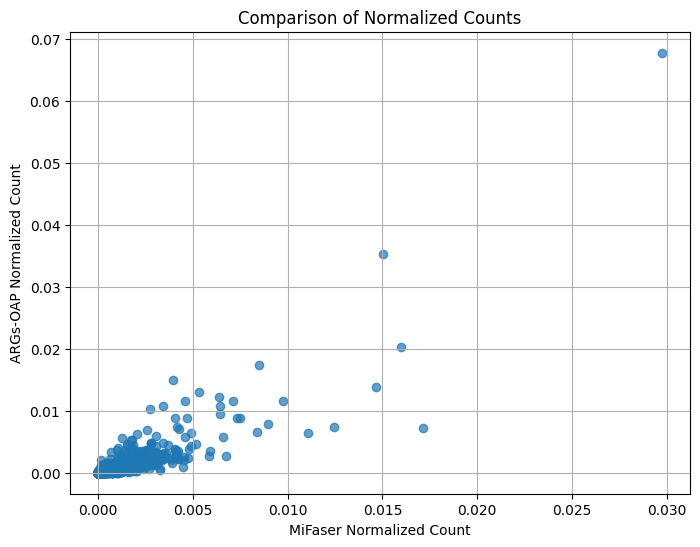

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data_cleaned["Normalized_mifaser"],
    merged_data_cleaned["Normalized_argsoap"],
    alpha=0.7
)
plt.title("Comparison of Normalized Counts")
plt.xlabel("MiFaser Normalized Count")
plt.ylabel("ARGs-OAP Normalized Count")
plt.grid(True)
plt.show()

In [12]:
top_differences = merged_data_cleaned.nlargest(10, "Absolute_Difference")
print(top_differences[["EC", "Normalized_mifaser", "Normalized_argsoap", "Absolute_Difference"]])

             EC  Normalized_mifaser  Normalized_argsoap  Absolute_Difference
730     2.7.7.6            0.029742            0.067807             0.038065
1564    7.1.2.2            0.015005            0.035305             0.020300
743    2.7.7.48            0.003938            0.014899             0.010961
780    2.7.13.3            0.017158            0.007215             0.009943
1547    6.3.5.5            0.008484            0.017452             0.008968
29     1.1.1.42            0.005334            0.013024             0.007690
1202   4.1.1.39            0.002716            0.010232             0.007516
1255  4.1.99.17            0.003416            0.010693             0.007277
962     3.3.1.1            0.004555            0.011502             0.006947
277   1.11.1.21            0.006376            0.012178             0.005802
